<a href="https://colab.research.google.com/github/team0243/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [19]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [20]:
Name = 'เกียรติศักดิ์ แสนจันทร์'
ID = '6232021041-7'

In [21]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [22]:
Data = DataGenerator(Name,ID)

202:26:22


In [23]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,8.268476,-2.596313,7.992211,4.880832,1.732595,-6.293575,-3.657833,-9.548312,-9.605208,-4.574406,-7.675465,-1.070429,-4.188731,-8.595726,-0.948590,2.898074,-2.185454,-6.246731,6.154771,2.406650,8.057719,5.996282,8.496187,2.129260,-5.407412,10.496486,-3.192626,52.482432
1,-5.541735,-9.243634,3.367534,0.554720,8.833335,-1.149066,-7.842363,6.305232,7.613122,-4.290894,1.554569,5.624840,-0.684340,4.513337,-3.596036,1.536031,-5.937365,7.794545,3.413970,1.622969,6.993684,-7.529766,2.923467,5.619824,-4.308026,7.368477,-16.487269,36.842383
2,-3.775369,-4.298036,10.277296,10.995981,9.745449,1.538862,0.646659,-7.450337,7.173228,-5.037215,11.591833,1.228801,-0.842008,-9.294036,-3.051721,6.218879,-1.817624,4.962123,-3.541439,7.416051,0.481664,-7.674120,-2.427914,5.772181,-0.759383,-3.846975,-6.596072,-19.234877
3,-9.516386,-1.593986,0.167019,-5.246101,-10.128708,3.757150,-1.396607,3.908383,6.786490,-10.190468,-3.426993,0.790349,-8.884679,-6.302985,-5.635541,4.033729,-5.233910,4.679210,-1.588548,7.092357,3.156782,3.145927,-7.879204,3.741720,9.562651,10.601600,-1.187972,53.008002
4,8.517287,-2.633188,-6.002154,-5.284413,-5.206580,1.111543,8.001509,-8.263739,-9.518081,10.469121,-5.468205,8.198344,9.083146,-10.636671,-9.414222,-4.118193,2.950821,-3.637806,-1.525345,7.384462,1.391205,-6.005914,-2.668039,-1.916942,8.323421,7.814523,-3.266377,39.072614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-8.438050,-11.532893,3.500144,0.902122,6.770527,0.264964,-7.941869,5.899492,8.797812,-3.200372,1.744145,4.942503,-0.908047,4.134697,-4.691043,2.237342,-7.053989,9.374583,2.790000,2.574864,7.757036,-8.193309,0.630268,5.369558,-3.362908,6.976571,-21.065787,34.882857
9996,1.440452,9.868928,-0.191936,6.426725,-9.886727,-9.122644,-8.368794,0.815915,-7.175130,1.679599,-3.697115,1.094966,9.490640,-0.360154,3.689532,-8.798591,8.178292,9.908215,-5.931274,-7.596021,1.804961,7.577610,-4.782650,-7.291673,-5.860812,4.223177,21.737856,21.115885
9997,9.588242,-6.021615,-6.020671,-4.915609,-5.086166,5.942247,5.485552,-9.911245,-8.228258,11.186496,-6.318238,7.261121,7.029409,-11.930434,-8.236129,-2.207784,0.740175,-5.861985,-3.145806,5.967559,2.261422,-4.497724,-2.186239,-4.027844,8.320766,8.069654,-10.043230,40.348269
9998,9.544732,-5.310680,-8.027318,-4.175691,-7.452056,2.083278,8.884436,-8.772328,-8.754921,11.380257,-7.093392,5.924515,8.330843,-10.249437,-8.879004,-2.572593,-0.449094,-5.779472,-2.457972,7.645739,0.273757,-5.716643,-0.488143,-3.832760,7.473491,8.730952,-8.621360,43.654760


# 2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ#

**Clustering หรือการจัดกลุ่มของข้อมูล จุดมุ่งหมายของการทำ Cluster Analysis คือ การจัดกลุ่มข้อมูลโดยดูจาก attributes ของข้อมูล**

**ขั้นตอนวิธีทำมีดังนี้**

#เช็คดูข้อมูลในตารางและหาcorrelation

In [22]:
import numpy as np   # import data

In [23]:
Data.shape   ## ขนาดของ Data (แถว,คอลัมน์)

(10000, 28)

In [24]:
corr = np.corrcoef(Data.to_numpy().T) # หา correlation

In [25]:
Data.corr()  # เรียกดูความสัมพันธ์ของ Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1.000000,0.278658,0.235054,-0.206321,-0.462338,-0.300921,0.148077,-0.628206,-0.425875,0.294896,0.044773,0.245434,0.263463,-0.085199,0.273089,-0.139701,0.083564,-0.202977,0.178037,-0.070897,0.247504,-0.028603,0.077693,-0.060568,-0.071690,0.095479,0.278658,0.095479
1,0.278658,1.000000,-0.038107,-0.076574,-0.272796,-0.034264,-0.226273,-0.054239,-0.186647,0.126185,0.166821,-0.007406,-0.222014,0.009230,0.073044,-0.479964,0.188681,0.295677,-0.057152,-0.461758,0.182638,0.195807,0.216821,0.041762,-0.004007,-0.200477,1.000000,-0.200477
2,0.235054,-0.038107,1.000000,-0.132485,0.157935,0.082951,-0.206772,-0.117152,0.085363,-0.033427,0.230856,0.322989,-0.150023,-0.217220,-0.036312,0.176617,0.130289,0.139381,0.158520,0.103264,0.235457,-0.174219,0.004752,0.142753,-0.286930,-0.107029,-0.038107,-0.107029
3,-0.206321,-0.076574,-0.132485,1.000000,0.114408,-0.292756,-0.048989,-0.005701,-0.028885,-0.249558,-0.219184,-0.024157,0.379867,-0.034920,0.305108,0.164199,-0.028540,0.096146,-0.210492,0.077356,0.016022,0.339300,-0.050463,0.156154,0.089797,0.146262,-0.076574,0.146262
4,-0.462338,-0.272796,0.157935,0.114408,1.000000,0.440855,0.010001,0.252359,0.229564,0.013150,0.189243,0.128189,-0.176701,0.064830,-0.255764,0.175944,-0.319710,-0.089510,-0.122475,-0.127901,0.051260,-0.097606,0.197745,0.098149,0.045844,-0.260001,-0.272796,-0.260001
5,-0.300921,-0.034264,0.082951,-0.292756,0.440855,1.000000,0.116088,0.116928,0.221908,0.155276,-0.035070,0.270518,-0.318513,-0.258417,-0.725176,-0.055684,-0.188606,-0.086466,-0.235792,0.177414,0.068786,-0.207246,0.058291,0.248072,0.398805,-0.032385,-0.034264,-0.032385
6,0.148077,-0.226273,-0.206772,-0.048989,0.010001,0.116088,1.000000,-0.251486,0.060710,-0.184431,0.131173,0.188028,0.225167,-0.182604,-0.005483,0.279353,-0.286674,-0.309292,-0.009199,0.214861,0.135572,-0.081726,-0.023082,-0.063118,0.166018,0.180335,-0.226273,0.180335
7,-0.628206,-0.054239,-0.117152,-0.005701,0.252359,0.116928,-0.251486,1.000000,0.084324,-0.129956,0.121158,-0.162310,-0.275352,0.112551,-0.093488,0.172740,0.081564,0.151652,-0.112990,-0.168497,-0.230142,0.148545,-0.186663,-0.111301,0.121025,0.107193,-0.054239,0.107193
8,-0.425875,-0.186647,0.085363,-0.028885,0.229564,0.221908,0.060710,0.084324,1.000000,-0.302974,0.002590,-0.096234,0.137525,0.165919,0.098554,0.231706,-0.119707,0.019798,0.212353,0.120044,-0.069641,0.016576,-0.012606,0.087347,-0.081955,-0.074567,-0.186647,-0.074567
9,0.294896,0.126185,-0.033427,-0.249558,0.013150,0.155276,-0.184431,-0.129956,-0.302974,1.000000,-0.134209,0.384093,0.175779,-0.095191,-0.110913,-0.382016,0.303836,-0.019509,-0.212608,0.004093,0.048293,0.061216,0.034092,-0.478982,0.286749,-0.190705,0.126185,-0.190705


In [14]:
corr.shape

(28, 28)

In [15]:
for i in range(corr.shape[0]):        # ใช้ for loop เช็คความสัมพันธ์ของ Data ที่ corr เท่ากัน
        for j in range(corr.shape[1]):
            if (i !=j )  and (corr[i,j] == 1):
                print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 26 corrcoef = 1.0
row = 25 column = 27 corrcoef = 1.0
row = 26 column = 1 corrcoef = 1.0
row = 27 column = 25 corrcoef = 1.0


In [16]:
new_data = Data.iloc[:,:25]
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,8.268476,-2.596313,7.992211,4.880832,1.732595,-6.293575,-3.657833,-9.548312,-9.605208,-4.574406,-7.675465,-1.070429,-4.188731,-8.595726,-0.948590,2.898074,-2.185454,-6.246731,6.154771,2.406650,8.057719,5.996282,8.496187,2.129260,-5.407412
1,-5.541735,-9.243634,3.367534,0.554720,8.833335,-1.149066,-7.842363,6.305232,7.613122,-4.290894,1.554569,5.624840,-0.684340,4.513337,-3.596036,1.536031,-5.937365,7.794545,3.413970,1.622969,6.993684,-7.529766,2.923467,5.619824,-4.308026
2,-3.775369,-4.298036,10.277296,10.995981,9.745449,1.538862,0.646659,-7.450337,7.173228,-5.037215,11.591833,1.228801,-0.842008,-9.294036,-3.051721,6.218879,-1.817624,4.962123,-3.541439,7.416051,0.481664,-7.674120,-2.427914,5.772181,-0.759383
3,-9.516386,-1.593986,0.167019,-5.246101,-10.128708,3.757150,-1.396607,3.908383,6.786490,-10.190468,-3.426993,0.790349,-8.884679,-6.302985,-5.635541,4.033729,-5.233910,4.679210,-1.588548,7.092357,3.156782,3.145927,-7.879204,3.741720,9.562651
4,8.517287,-2.633188,-6.002154,-5.284413,-5.206580,1.111543,8.001509,-8.263739,-9.518081,10.469121,-5.468205,8.198344,9.083146,-10.636671,-9.414222,-4.118193,2.950821,-3.637806,-1.525345,7.384462,1.391205,-6.005914,-2.668039,-1.916942,8.323421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-8.438050,-11.532893,3.500144,0.902122,6.770527,0.264964,-7.941869,5.899492,8.797812,-3.200372,1.744145,4.942503,-0.908047,4.134697,-4.691043,2.237342,-7.053989,9.374583,2.790000,2.574864,7.757036,-8.193309,0.630268,5.369558,-3.362908
9996,1.440452,9.868928,-0.191936,6.426725,-9.886727,-9.122644,-8.368794,0.815915,-7.175130,1.679599,-3.697115,1.094966,9.490640,-0.360154,3.689532,-8.798591,8.178292,9.908215,-5.931274,-7.596021,1.804961,7.577610,-4.782650,-7.291673,-5.860812
9997,9.588242,-6.021615,-6.020671,-4.915609,-5.086166,5.942247,5.485552,-9.911245,-8.228258,11.186496,-6.318238,7.261121,7.029409,-11.930434,-8.236129,-2.207784,0.740175,-5.861985,-3.145806,5.967559,2.261422,-4.497724,-2.186239,-4.027844,8.320766
9998,9.544732,-5.310680,-8.027318,-4.175691,-7.452056,2.083278,8.884436,-8.772328,-8.754921,11.380257,-7.093392,5.924515,8.330843,-10.249437,-8.879004,-2.572593,-0.449094,-5.779472,-2.457972,7.645739,0.273757,-5.716643,-0.488143,-3.832760,7.473491


#*K-Means*

**Import**

In [11]:
from sklearn.cluster import KMeans   ## เริ่มทำการ import ก่อน
import matplotlib.pyplot as plt          
from sklearn.decomposition import PCA

**Define**

In [18]:
kmeans = KMeans()  ### กำหนด define 
pca1 = PCA()

**Fit - Transform**

In [19]:
kmeans.fit(Data) # เเสดง จุด cluster centers ที่คำนวณออกมาได้

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
kmeans.cluster_centers_ #เรียกดูค่า k-mean center ในแต่ละ cluster

array([[ 2.94963402e+00,  6.34557021e+00,  3.55023309e+00,
        -6.45371746e+00, -2.86876677e+00, -8.83628204e-01,
        -6.63786621e+00, -2.50380329e+00, -7.95929080e-01,
         2.59506443e+00,  6.89624650e+00, -7.75681439e-01,
        -8.02500311e+00, -9.24212356e-01, -3.69789056e+00,
        -1.24527810e+00,  5.26838977e+00,  5.95944211e+00,
         2.03213071e+00, -2.73690652e+00,  5.74872038e-01,
        -3.35465772e+00,  4.97977238e+00,  2.83892616e+00,
        -2.91579890e+00, -4.35158983e+00,  1.46911404e+01,
        -2.17579492e+01],
       [-1.32497609e+00, -4.47525251e+00, -2.41903780e+00,
        -9.82168546e-01, -4.60682213e+00, -6.60082867e+00,
        -1.79323945e+00, -6.06154883e+00,  6.66146102e+00,
        -2.13585904e+00, -2.65960429e+00, -2.30255465e+00,
         5.45972569e+00,  5.80794247e+00,  3.76255492e+00,
         1.28615433e+00,  1.43051969e+00, -6.07332871e-01,
         3.82711249e+00,  6.34036611e-01, -1.52301120e+00,
        -3.45919260e+00, -6.06

## ทำ PCA เพื่อลด Dimension ของข้อมูลเนื่องจากมีจำนวน Dimension ที่เยอะเกินไป


**Import**

In [22]:
from sklearn.decomposition import PCA

**Define**

In [23]:
pca = PCA(n_components=2)

**Fit - Transform**

In [24]:
new_pca = pca.fit_transform(Data)

In [25]:
new_pca.shape # จะเห็นว่า dimension เหลือเเค่ 2 dimension

(10000, 2)

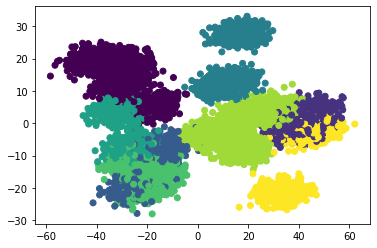

In [26]:
kmeans = KMeans()         
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)   # plot กราฟดูการกระจายของ Data

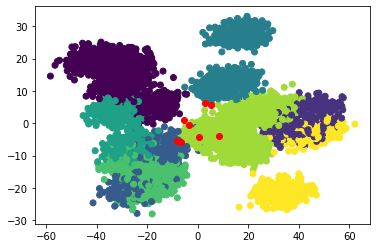

In [27]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) # cluster center
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

**ทำการหาค่า k ว่าควรจะเป็นเท่าไหร่ โดบการใช้ Elbow Method ในการช่วยหาค่า k ที่เหมาะสม**

#SSE (Sum of Squared Errors) คือ ความไม่ใกล้เคียงกับจุดศูนย์กลางมากน้อยเท่าไหน

In [28]:
SSE = list()  # สร้าง list ชื่อว่า SSE      ### เพื่อหาค่า Sum of Squared Errors
for k in [1,2,3,4,5,6,7,8]:   # for loop ตัวแปร k ตั้งแต่ 1-8  
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [29]:
SSE #ค่า Sum of Squared Errors

[16943434.160707638,
 10489659.312723009,
 9154442.622476546,
 7973096.279283008,
 7244800.145223601,
 6660863.545110608,
 6008729.302424032,
 5374975.830697634]

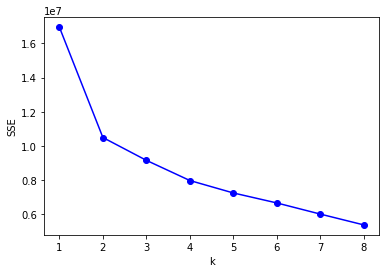

In [30]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')  # plot กราฟแสดงค่า SSE
plt.xlabel('k')  ## กำหนดให้แกน X ชื่อ "K"
plt.ylabel('SSE');  ## กำหนดให้แกน Y ชื่อ "Sum of Squared Errors"

In [31]:
kmeans.inertia_  # ผลรวมของระยะทางกำลังสองของตัวอย่างไปยังศูนย์กลางคลัสเตอร์ที่ใกล้ที่สุด

5374975.830697634

**เลือก k = 2 กลุ่ม**   เนื่องจากมีทิศทางการเปลี่ยนแปลงมากที่สุด

## Silhouette coefficient  คือ วิธีไว้ใช้หาจำนวน k ที่เหมาะสมที่สุด

**#ข้อควรระวัง Silhouette coefficient ไม่สามารถคิดข้อมูลที่มีกลุ่มเดียวได้**

In [32]:
from sklearn import metrics # import metrics จาก sklearn

In [33]:
SilH = list()
for k in [2,3,4,5,6,7,8]: # Silhouette Score เป็น 1 ไม่ได้
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

In [35]:
SilH         ### ค่า Silhouette Score

[0.3348009055872885,
 0.27381680694355426,
 0.25569447338385126,
 0.284911669335655,
 0.30192071219289374,
 0.32402430704803303,
 0.3582720597944491]

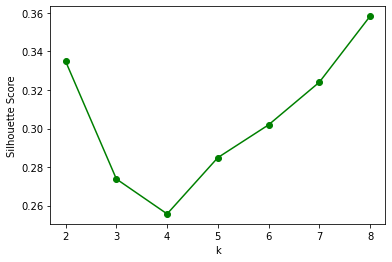

In [34]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g') # ทำการ Silhouette ดีที่สุดที่ คือ 2
plt.xlabel('k')
plt.ylabel('Silhouette Score');

จากกราฟ k = 8 มีค่า Silhouette Score สูงที่สุด แสดงว่า ข้อมูลมีความใกล้กันมากในกลุ่มเดียวกันและมีความห่างกันมากของต่างกลุ่มกัน

ดังนั้น ข้อมูลชุดนี้ควรมี 8 กลุ่ม

# 3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

**ใช้วิธี MDS (Multidimension Scaling) คือ การลดขนาดของตัวเเปร จากที่มีเยอะให้เหลือน้อยๆ**

In [31]:
from sklearn.manifold import MDS

In [32]:
mds = MDS(n_components=2)

In [33]:
new_mds = mds.fit_transform(Data)

In [34]:
kmeans_2 = KMeans(n_clusters=8,random_state=2021)  #ให้ k= 8   
kmeans_2.fit(Data)
g = kmeans_2.predict(Data)

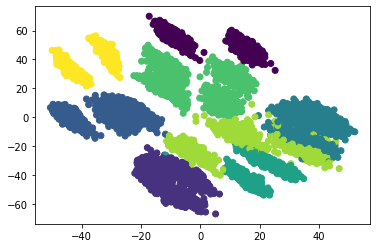

In [35]:
kmeans= KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_mds[:,0],new_mds[:,1],c=y) #ผลลัพธ์ของการทำ MDS

# **4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.**

**รูปข้อที่ 2**

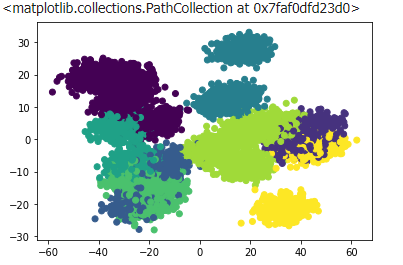

**รูปข้อที่ 3**

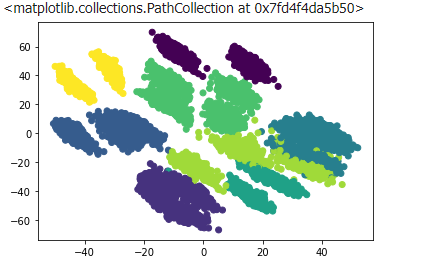


**เปรียบเทียบระหว่างข้อ 2 กับ ข้อ 3 พบว่า หลังจากการลด dimension ของข้อมูลด้วย mds เเล้วข้อมูลมีการกระจายที่เเตกต่างกัน ***